## ECM3420 Learning from Data Continuous Assessment
# Data Exploration

Import fundamental libraries

In [1195]:
%matplotlib inline
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read fortune 500 dataset and preprocess by removing any null values and and commas from numbers

In [1196]:
df = pd.read_csv('Fortune 500 2017 - Fortune 500.csv')
df = df.dropna() # Removes any null rows
df = df.replace(',','', regex=True) # Removes all commas in numbers
display(df.head())

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,Bentonville AR,702 S.W. Eighth St.,Bentonville,AR,...,President Chief Executive Officer & Director,702 S.W. Eighth St. Bentonville AR 72716,WMT,Wal-Mart Stores Inc.,485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),Omaha NE,3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,3555 Farnam St. Omaha NE 68131,BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,Computers Office Equipment,Cupertino CA,1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,1 Infinite Loop Cupertino CA 95014,AAPL,Apple Inc.,215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,Irving TX,5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,5959 Las Colinas Blvd. Irving TX 75039,XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,San Francisco CA,1 Post St.,San Francisco,CA,...,Chairman President & Chief Executive Officer,1 Post St. San Francisco CA 94104,MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [1197]:
df.columns

Index(['Rank', 'Title', 'Website', 'Employees', 'Sector', 'Industry',
       'Hqlocation', 'Hqaddr', 'Hqcity', 'Hqstate', 'Hqzip', 'Hqtel', 'Ceo',
       'Ceo-title', 'Address', 'Ticker', 'Fullname', 'Revenues', 'Revchange',
       'Profits', 'Prftchange', 'Assets', 'Totshequity'],
      dtype='object')

Condense columns to sector and numerical data

In [1198]:
#df = df[['Rank', 'Title', 'Employees', 'Sector', 'Revenues', 'Revchange', 'Profits', 'Prftchange', 'Assets', 'Totshequity']]
df = df[['Employees', 'Sector', 'Revenues', 'Revchange', 'Profits', 'Prftchange', 'Assets', 'Totshequity']]
display(df)

,Employees,Sector,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,2300000,Retailing,485873,0.8,13643.0,-7.2,198825,77798.0
1,367700,Financials,223604,6.1,24074.0,0,620854,283001.0
2,116000,Technology,215639,-7.7,45687.0,-14.4,321686,128249.0
3,72700,Energy,205004,-16.7,7840.0,-51.5,330314,167325.0
4,68000,Wholesalers,192487,6.2,2258.0,53,56563,8924.0
...,...,...,...,...,...,...,...,...
495,31000,Retailing,5197,5.8,378.2,4.2,2148,-1698.0
496,4200,Engineering & Construction,5170,23.9,382.1,5.2,9737,4229.0
497,8500,Technology,5169,4.0,-214.3,5.2,48083,31049.0
498,4431,Energy,5164,4.0,-214.3,5.2,15167,6597.0


# Add Debt-To-Equity Ratio derived column as it is a significant dividing factor in some economic sectors.

In [1199]:
df["Debt-To-Equity Ratio"] = ((df["Assets"] - df["Totshequity"]) / df["Totshequity"])
display(df)

,Employees,Sector,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Debt-To-Equity Ratio
0,2300000,Retailing,485873,0.8,13643.0,-7.2,198825,77798.0,1.555657
1,367700,Financials,223604,6.1,24074.0,0,620854,283001.0,1.193823
2,116000,Technology,215639,-7.7,45687.0,-14.4,321686,128249.0,1.508292
3,72700,Energy,205004,-16.7,7840.0,-51.5,330314,167325.0,0.974086
4,68000,Wholesalers,192487,6.2,2258.0,53,56563,8924.0,5.338301
...,...,...,...,...,...,...,...,...,...
495,31000,Retailing,5197,5.8,378.2,4.2,2148,-1698.0,-2.265018
496,4200,Engineering & Construction,5170,23.9,382.1,5.2,9737,4229.0,1.302436
497,8500,Technology,5169,4.0,-214.3,5.2,48083,31049.0,0.548617
498,4431,Energy,5164,4.0,-214.3,5.2,15167,6597.0,1.299075


Find frequency of each sector in the dataset

In [1200]:
df['Sector'].value_counts()

Financials                      84
Energy                          57
Retailing                       47
Technology                      43
Health Care                     38
Wholesalers                     29
Food Beverages & Tobacco        24
Business Services               20
Materials                       19
Industrials                     19
Transportation                  17
Chemicals                       14
Engineering & Construction      13
Household Products              12
Aerospace & Defense             12
Media                           11
Hotels Restaurants & Leisure    10
Telecommunications              10
Motor Vehicles & Parts           9
Food & Drug Stores               7
Apparel                          5
Name: Sector, dtype: int64

In [1201]:
financialsSector = df.loc[df['Sector'].isin(['Financials'])]
display(financialsSector.head())

,Employees,Sector,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Debt-To-Equity Ratio
1,367700,Financials,223604,6.1,24074.0,0,620854,283001.0,1.193823
19,7000,Financials,107162,-2.9,12313.0,12.4,3287968,6071.0,540.585900
20,243355,Financials,105486,4.4,24733.0,1.2,2490972,254190.0,8.799646
24,269100,Financials,94176,4.6,21938.0,-4.2,1930115,199581.0,8.670835
25,208024,Financials,93662,0.7,17906.0,12.7,2187702,266840.0,7.198553


Find maximum and minimum values for all respective columns

In [1202]:
maxValues = df.max()
display(maxValues)
minValues = df.min()
display(minValues)

Employees                   2300000
Sector                  Wholesalers
Revenues                     485873
Revchange                     197.3
Profits                     45687.0
Prftchange                     99.7
Assets                      3287968
Totshequity                283001.0
Debt-To-Equity Ratio       540.5859
dtype: object

Employees                                83
Sector                  Aerospace & Defense
Revenues                               5145
Revchange                             -57.5
Profits                             -6177.0
Prftchange                             -0.2
Assets                                  437
Totshequity                        -12688.0
Debt-To-Equity Ratio            -144.156863
dtype: object

Explore and identify the strong attributes defining different sectors using boxplots over the dataset

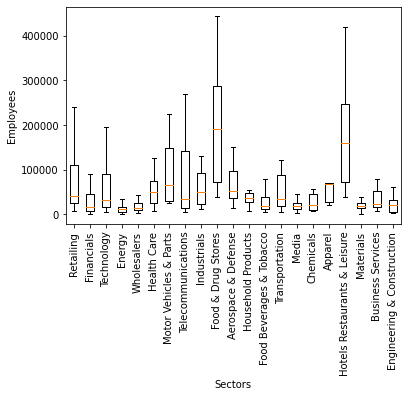

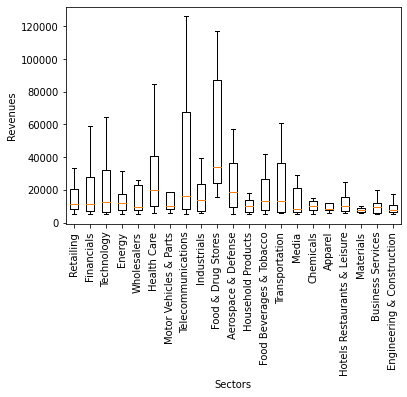

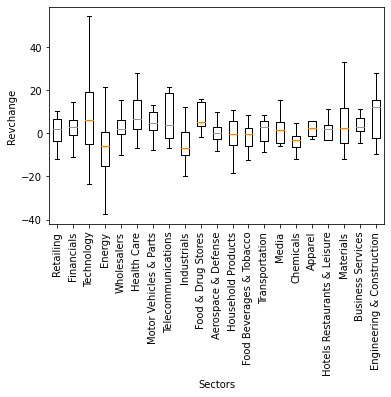

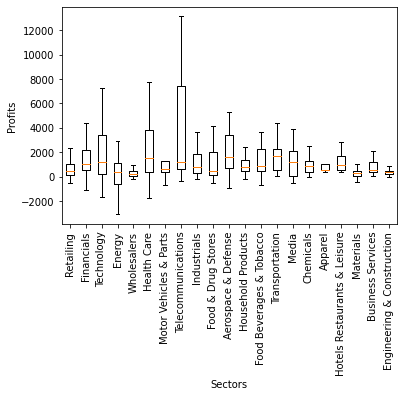

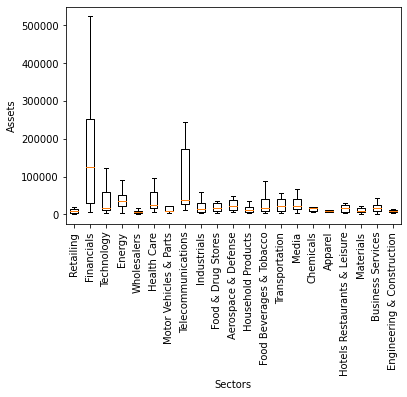

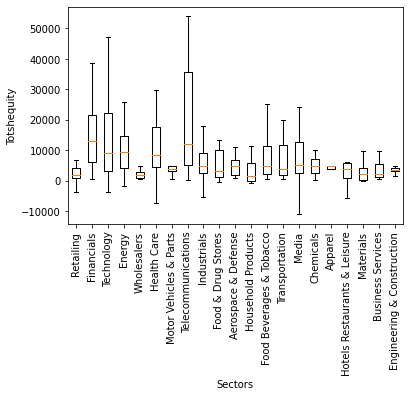

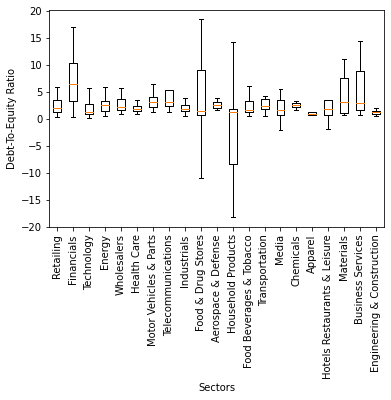

In [1203]:
sectors = list(df["Sector"].unique())
columns = df.columns
for column in columns.drop(['Sector', 'Prftchange']):
    sectorPerformances = [df[df['Sector'].isin([x])][column].tolist() for x in sectors]
    #Not displaying outliers since it make everything alse smaller
    plt.boxplot(sectorPerformances, labels=sectors, showfliers=False)
    plt.xticks(rotation=90)
    plt.xlabel("Sectors")
    plt.ylabel(column)
    plt.show()

In [1204]:
def getChosenSectors(sectors) -> pd.DataFrame:
    # Obtains all relevant sectors
    sectorsAll = df.loc[df['Sector'].isin(sectors)]
    min = sectorsAll['Sector'].value_counts().min() #Finds sector with the lowest total values to avoid bias
    sectorsMin = pd.DataFrame(columns=df.columns) #Initialise final data frame
    for sector in sectors:
        #Add the minimum random rows for each sector to the final data frame
        sectorsMin = pd.concat([sectorsMin, sectorsAll.loc[df['Sector'].isin([sector])].sample(min)])
    return(sectorsMin)

#Select the number of sectors to use
numberOfSectors = 6
sectorsByFrequency = df['Sector'].value_counts().index.tolist()
#Manual input
#selectedFrame = getChosenSectors([])
selectedFrame = getChosenSectors(sectorsByFrequency[0:numberOfSectors])
display(selectedFrame)

X = selectedFrame[['Revenues', 'Revchange', 'Profits', 'Prftchange', 'Assets', 'Totshequity', 'Debt-To-Equity Ratio']]
Y = selectedFrame[['Sector']]

,Employees,Sector,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Debt-To-Equity Ratio
213,75000,Financials,13072,20.4,572.0,4.5,10780,3015.0,2.575456
447,11800,Financials,5810,1.8,213.0,15.8,7421,2464.0,2.011769
98,30900,Financials,27625,3.1,3014.0,-12.4,100245,23221.0,3.316998
176,52000,Financials,15683,1.0,3547.0,12.3,333469,38811.0,7.592126
245,2371,Financials,11522,10.6,701.4,39.7,53098,7093.1,6.485867
...,...,...,...,...,...,...,...,...,...
419,8500,Wholesalers,6385,4.5,93.1,2.2,2099,728.0,1.883242
303,42500,Wholesalers,9082,26.3,464.0,9.6,8303,3442.9,1.411630
330,8700,Wholesalers,8327,-4.5,21.0,-21.3,2484,542.0,3.583026
488,17000,Wholesalers,5314,0.2,337.5,-8.3,6135,2045.0,2.000000


Split the data for training

In [1205]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
#Displays top 5 chosen training data
X_train.head()
# Y_train.head()

,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Debt-To-Equity Ratio
253,11229,21.3,1999.2,24.8,28086,6599.0,3.256099
333,8240,-20.1,-199.4,-557.8,2564,393.0,5.524173
86,33184,7.2,2298.2,0.9,12884,4511.0,1.856129
358,7625,15.6,120.5,-5.6,4094,1292.0,2.168731
20,105486,4.4,24733.0,1.2,2490972,254190.0,8.799646


In [1206]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

#Initialise MLP class with specified number of hidden layers
clf = MLPClassifier(hidden_layer_sizes=20)
#Train the model
clf.fit(X_train,Y_train.values.ravel())

#1 iteration of predicted test results with trained model
accuracy_score(clf.predict(X_test),Y_test)
scores = cross_val_score(clf, X_test, Y_test.values.ravel(), cv=5)
print(f"Accuracy:\n Mean: {scores.mean()} Standard Deviation: {scores.std()}")

Accuracy:
 Mean: 0.18727272727272726 Standard Deviation: 0.055028167092442015


# Standardise and Normalise the Training Data and find the best method

Mean Accuracy measures how often the classifier predicts the class correctly, defined by the ratio:
Number of Correct Data Points/Number of data Points
Standard Deviation is defined by the measure of variation of the mean accuracy of K folds

In [1207]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X_strain = StandardScaler().fit_transform(X_train)
X_stest = StandardScaler().fit_transform(X_test)
X_ntrain = StandardScaler().fit_transform(X_train)
X_ntest = StandardScaler().fit_transform(X_test)

In [1208]:
hidden_units = [5,10,15,20,30,50]
best_mean_process = ""
best_deviation_process = ""
highest_mean = 0
lowest_std_deviation = 1
best_mean_units = 0
best_deviation_units = 0

# def checkBest(scores, process, unit):
#     if scores.mean() > highest_mean:
#         highest_mean = scores.mean()
#         best_mean_process = process
#         best_mean_units = unit
#     if scores.std() < lowest_std_deviation:
#         lowest_std_deviation = scores.std()
#         best_deviation_process = process
#         best_deviation_units = unit

for unit in hidden_units:
    clf = MLPClassifier(hidden_layer_sizes=unit, max_iter=5000) #Create the MLP classifier
    clf.fit(X_strain,Y_train.values.ravel()) #Train data with the MLP classifier
    scores = cross_val_score(clf, X_stest, Y_test.values.ravel(), cv=5) #Cross check actual values with predicted values to calculate accuracy
    print(f"Standardised. Hidden Units: {unit} \nAccuracy: Mean: {scores.mean()} Standard Deviation: {scores.std()}")
    if scores.mean() > highest_mean: #Checks and stores hyper parameters with the highest mean
        highest_mean = scores.mean()
        best_mean_process = "Standardisation"
        best_mean_units = unit
    if scores.std() < lowest_std_deviation:
        lowest_std_deviation = scores.std()
        best_deviation_process = "Standardisation"
        best_deviation_units = unit
    clf.fit(X_ntrain,Y_train.values.ravel())
    scores = cross_val_score(clf, X_ntest, Y_test.values.ravel(), cv=5)
    print(f"Normalised. Hidden Units: {unit} \nAccuracy: Mean: {scores.mean()} Standard Deviation: {scores.std()}")
    if scores.mean() > highest_mean: #Checks and stores hyper parameters with the lowest standard deviation
        highest_mean = scores.mean()
        best_mean_process = "Normalisation"
        best_mean_units = unit
    if scores.std() < lowest_std_deviation:
        lowest_std_deviation = scores.std()
        best_deviation_process = "Normalisation"
        best_deviation_units = unit
print("\nBest results: \nMean Accuracy = " + str(highest_mean) + " from " + str(best_mean_process) + "\nStandard Deviation = " + str(lowest_std_deviation) + " from " + str(best_deviation_process))

Standardised. Hidden Units: 5 
Accuracy: Mean: 0.44909090909090904 Standard Deviation: 0.12902687272152852
Normalised. Hidden Units: 5 
Accuracy: Mean: 0.37636363636363634 Standard Deviation: 0.13106051847956435
Standardised. Hidden Units: 10 
Accuracy: Mean: 0.39272727272727276 Standard Deviation: 0.11418413431350967
Normalised. Hidden Units: 10 
Accuracy: Mean: 0.3381818181818182 Standard Deviation: 0.14239973999419106
Standardised. Hidden Units: 15 
Accuracy: Mean: 0.4290909090909091 Standard Deviation: 0.17753127998158758
Normalised. Hidden Units: 15 
Accuracy: Mean: 0.43090909090909085 Standard Deviation: 0.12027516660757255
Standardised. Hidden Units: 20 
Accuracy: Mean: 0.39454545454545453 Standard Deviation: 0.10688682513962958
Normalised. Hidden Units: 20 
Accuracy: Mean: 0.3527272727272728 Standard Deviation: 0.15118266549809023
Standardised. Hidden Units: 30 
Accuracy: Mean: 0.41090909090909095 Standard Deviation: 0.15906753074981383
Normalised. Hidden Units: 30 
Accuracy: M

# Find the optimal Confusion Matrix of the best preprocessing method(s) by training the model until the best result converges

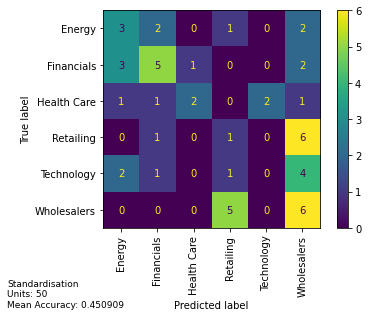

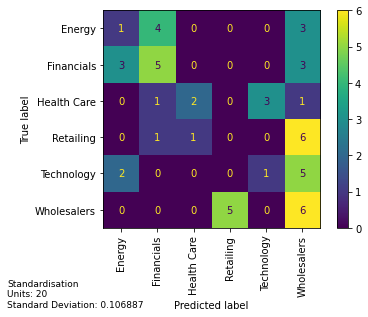

In [1209]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
mean_text = best_mean_process + "\nUnits: " + str(best_mean_units) + "\nMean Accuracy: " + str(round(highest_mean, 6))
deviation_text = best_deviation_process + "\nUnits: " + str(best_deviation_units) + "\nStandard Deviation: " + str(round(lowest_std_deviation, 6))
if best_mean_process == "Standardisation":
    clf = MLPClassifier(hidden_layer_sizes=best_mean_units, max_iter=5000)
    clf.fit(X_strain,Y_train.values.ravel())
    ConfusionMatrixDisplay.from_predictions(Y_test.values.ravel(), clf.predict(X_stest))
else:
    clf = MLPClassifier(hidden_layer_sizes=best_mean_units, max_iter=5000)
    clf.fit(X_ntrain,Y_train.values.ravel())
    ConfusionMatrixDisplay.from_predictions(Y_test.values.ravel(), clf.predict(X_ntest))
if numberOfSectors < 5:
    plt.text(0.02, 0.03, mean_text, fontsize=9, transform=plt.gcf().transFigure)
else:
    plt.text(0.02, -0.15, mean_text, fontsize=9, transform=plt.gcf().transFigure)
    plt.xticks(rotation=90)
if best_deviation_process == "Standardisation":
    clf = MLPClassifier(hidden_layer_sizes=best_deviation_units, max_iter=5000)
    clf.fit(X_strain,Y_train.values.ravel())
    ConfusionMatrixDisplay.from_predictions(Y_test.values.ravel(), clf.predict(X_stest))
else:
    clf = MLPClassifier(hidden_layer_sizes=best_deviation_units, max_iter=5000)
    clf.fit(X_ntrain,Y_train.values.ravel())
    ConfusionMatrixDisplay.from_predictions(Y_test.values.ravel(), clf.predict(X_ntest))
if numberOfSectors < 5:
    plt.text(0.02, 0.03, deviation_text, fontsize=9, transform=plt.gcf().transFigure)
else:
    plt.text(0.02, -0.15, deviation_text, fontsize=9, transform=plt.gcf().transFigure)
    plt.xticks(rotation=90)
plt.show()


# Initialise DBSCAN cluster algorithm libraries 

In [1210]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

Preprocess the selected frame data with the Standard Scaler and Principal Component Analysis (PCA), increasing the informativity of the data in preparation for the DBSCAN

In [1211]:
try:
    initialSelectedFrame = selectedFrame
    selectedFrame = selectedFrame.drop('Sector', axis=1)
except:
    print("Sector no longer exists")
scaler = StandardScaler()
x_scaled = scaler.fit_transform(selectedFrame)
#display(x_scaled)
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_scaled)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['Debt-To-Equity Ratio', 'Profit']
#print(x_principal.head())

In [1212]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(x_principal)
distances, indices = nbrs.kneighbors(x_principal)
#print(distances)

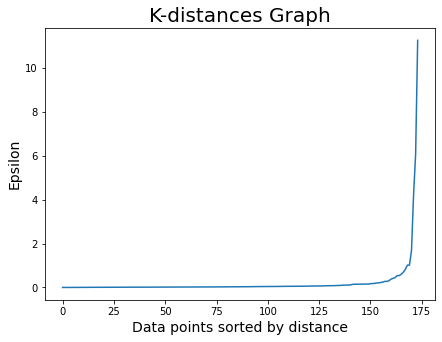

In [1213]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(7,5))
plt.plot(distances)
plt.title('K-distances Graph', fontsize=20)
plt.xlabel('Data points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14) #Average k distance
plt.show()

Initialise the hyper parameters of the DBSCAN graph

In [1214]:
eps_val = 0.5
samples = 3
dbscan = DBSCAN(eps=eps_val, min_samples=samples).fit(x_principal)
labels = dbscan.labels_
labels_true = initialSelectedFrame['Sector']

selectedFrame['DBSCAN_labels'] = dbscan.labels_
selectedFrame['DBSCAN_labels'].value_counts()
labels.max()

0

Assessed values:

Homogeneity - Clusters only contain data points which are members of a single sector

Completeness - All the data points that are members of a given class are elements of the same cluster

V-measure - The harmonic mean between homogeneity and completeness 

Adjusted Rand Index - The corrected-for-chance version of the Rand index

Adjusted Mutual Information - A variation of mutual information may be used for comparing clusterings 

Silhouette Coefficient - Evaluates how well apart from each other and clearly distinguished points are (-1 to 1 is good)

In [1215]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)  
info = ('Actual number of clusters: %d' % numberOfSectors
+'\nEstimated number of clusters: %d' % n_clusters_ 
+'\nEstimated number of noise points: %d' % n_noise_
+'\nEpsilon Value: %d' % eps_val
+"\nMin samples: %d" % samples
+"\nHomogeneity: %0.3f" % metrics.homogeneity_score (labels_true, labels)
+"\nCompleteness: %0.3f" % metrics.completeness_score (labels_true, labels)
+"\nV-measure: %0.3f" % metrics.v_measure_score(labels_true, labels)
+"\nAdjusted Rand Index: %0.3f" % metrics.adjusted_rand_score (labels_true, labels)
+"\nAdjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score (labels_true, labels)
+"\nSilhouette Coefficient: %0.3f" % metrics.silhouette_score (X, labels))
print(info)

Actual number of clusters: 6
Estimated number of clusters: 1
Estimated number of noise points: 11
Epsilon Value: 0
Min samples: 3
Homogeneity: 0.010
Completeness: 0.078
V-measure: 0.018
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.001
Silhouette Coefficient: 0.841


Plot DBSCAN graph

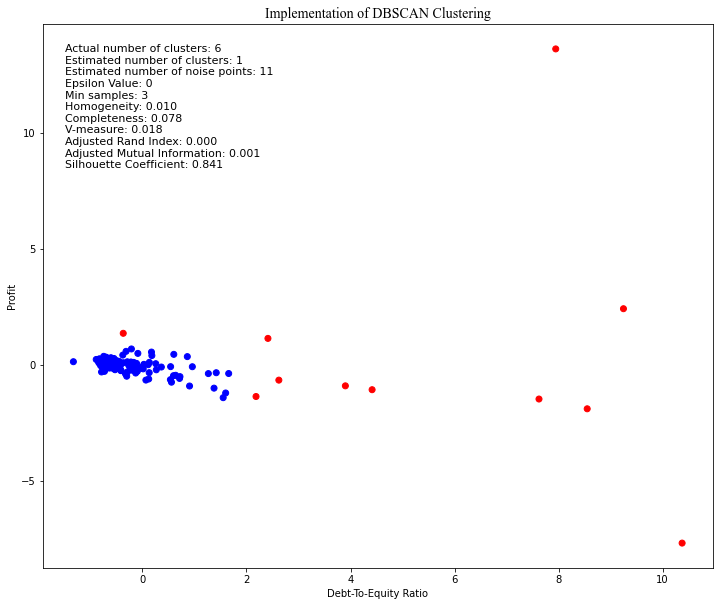

In [1216]:
clusterColor = { 0:u'blue', 1:u'green', 2:'yellow', 3:'orange', 4:'pink', 5:'violet', 6:'purple', 7:'grey', 8:'black', -1:'red' }
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12,10))
plt.scatter(x_principal['Debt-To-Equity Ratio'],x_principal['Profit'], c=colors)
plt.xlabel(x_principal.columns[0])
plt.ylabel(x_principal.columns[1])
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman", fontsize=14)
plt.text(0.15, 0.68, info, fontsize=11, transform=plt.gcf().transFigure)
plt.show()